In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import random
from skimage import transform
import shutil
import matplotlib.image as mpimg

In [15]:
print(os.getcwd())

/Users/cylogan/sound_classification_project/wav-file-model


In [16]:
metadata = pd.read_csv("UrbanSound8K.csv")
metadata.head()
metadata.shape

(8732, 8)

In [17]:
class_names = metadata["class"].unique()
np.array(class_names)


array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [18]:
# Helper function to convert a wav to a mel_spectrogram

def wav_to_mel_spectrogram(wav_path, sr=22050, n_mels=128, hop_length=512, fmax=8000):
    y, sr = librosa.load(wav_path, sr=sr)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length, fmax=fmax)
    S_db = librosa.power_to_db(S, ref=np.max)
    return S_db

In [19]:
# Helper function to normalize a mel-spectrogram
def normalize_image(S_db):
    min_db = S_db.min()
    max_db = S_db.max()
    S_db = (S_db - min_db) / (max_db - min_db)
    return S_db

In [24]:
# Function to save the images

def save_spectrogram(S_db, output_filepath):
    S_db_normalized = normalize_image(S_db)
    S_db_final = transform.resize(S_db_normalized, (128, 128), anti_aliasing=True)
    plt.imsave(output_filepath, S_db_final)


In [30]:
print(os.getcwd())

/Users/cylogan/sound_classification_project/wav-file-model


In [26]:
output_base_directory = "./normalized_spectrograms/"
os.makedirs(output_base_directory, exist_ok=True)

In [27]:
for class_name in class_names:
    class_directory = os.path.join(output_base_directory, class_name)
    os.makedirs(class_directory, exist_ok=True)

In [28]:
wav_dir_path = "./audio/"
max_files_per_class = 200

files_processed_per_class = {class_name: 0 for class_name in class_names}
unused_wav_files = []

for index, row in metadata.iterrows():
    class_name = row["class"]
    if files_processed_per_class[class_name] >= max_files_per_class:
        unused_wav_files.append(os.path.join(wav_dir_path, f"fold{row['fold']}", row['slice_file_name']))
        continue
    folder = f"fold{row['fold']}"
    filename=row["slice_file_name"]
    wav_path = os.path.join(wav_dir_path, folder, filename)

    output_path = os.path.join(output_base_directory, class_name, f"{os.path.splitext(filename)[0]}.png")

    S_db = wav_to_mel_spectrogram(wav_path)
    save_spectrogram(S_db, output_path)
    files_processed_per_class[class_name] += 1
    print(f"Spectrogram save to {output_path}")

for file in unused_wav_files:
    os.remove(file)
    print(f"deleted file {file}")
    

Spectrogram save to ./normalized_spectrograms/dog_bark/100032-3-0-0.png
Spectrogram save to ./normalized_spectrograms/children_playing/100263-2-0-117.png
Spectrogram save to ./normalized_spectrograms/children_playing/100263-2-0-121.png
Spectrogram save to ./normalized_spectrograms/children_playing/100263-2-0-126.png
Spectrogram save to ./normalized_spectrograms/children_playing/100263-2-0-137.png
Spectrogram save to ./normalized_spectrograms/children_playing/100263-2-0-143.png
Spectrogram save to ./normalized_spectrograms/children_playing/100263-2-0-161.png
Spectrogram save to ./normalized_spectrograms/children_playing/100263-2-0-3.png
Spectrogram save to ./normalized_spectrograms/children_playing/100263-2-0-36.png
Spectrogram save to ./normalized_spectrograms/car_horn/100648-1-0-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/100648-1-1-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/100648-1-2-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/1006

/Users/cylogan/sound_classification_project/.venv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(


Spectrogram save to ./normalized_spectrograms/car_horn/175852-1-0-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/175853-1-0-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/175854-1-0-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/175855-1-0-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/175856-1-0-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/175856-1-1-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/175856-1-2-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/176003-1-0-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/176631-1-0-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/176634-1-0-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/176638-1-0-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/176638-1-1-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/178115-1-0-0.png
Spectrogram save to ./normalized_spectrograms/car_horn/178402-1-

In [29]:
class_dirs = os.listdir(output_base_directory)
for class_dir in class_dirs:
    class_path = os.path.join(output_base_directory, class_dir)
    print(f"number {class_dir} image is {len(os.listdir(class_path))}")


number siren image is 200
number car_horn image is 200
number gun_shot image is 200
number drilling image is 200
number street_music image is 200
number children_playing image is 200
number air_conditioner image is 200
number dog_bark image is 200
number engine_idling image is 200
number jackhammer image is 200


In [4]:
base_dir = "./normalized_spectrograms/"
classes = os.listdir(base_dir)

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def split_and_move_images(class_name):
    class_dir = os.path.join(base_dir, class_name)
    png_files = [f for f in os.listdir(class_dir) if f.endswith(".png")]
    random.shuffle(png_files)
    num_train = int(len(png_files) * 0.8)
    train_files = png_files[:num_train]
    test_files = png_files[num_train:]
    for file in train_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(train_dir, class_name, file)
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        shutil.move(src, dst)
    for file in test_files:
        src = os.path.join(class_dir, file)
        dst = os.path.join(test_dir, class_name, file)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
        shutil.move(src, dst)

class_names = os.listdir(base_dir)
for class_name in class_names:
    split_and_move_images(class_name)


In [2]:
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_image(image, channels = 3)
    image = tf.image.resize(image, target_size)
    image = image / 255.
    return image

def process_images_in_directory(directory):
    images = []
    labels = []
    class_names = os.listdir(directory)
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):  # Check if it's a directory
            image_files = os.listdir(class_dir)
            for image_file in image_files:
                image_path = os.path.join(class_dir, image_file)
                image = load_and_preprocess_image(image_path)
                images.append(image)
                labels.append(class_name)
    return images, labels

In [5]:
train_images, train_labels = process_images_in_directory(train_dir)
test_images, test_labels = process_images_in_directory(test_dir)


2024-06-07 13:55:25.598389: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-06-07 13:55:25.598413: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-07 13:55:25.598419: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-07 13:55:25.598442: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-07 13:55:25.598458: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
print(len(train_images), len(test_images), len(train_labels), len(test_labels))


1600 400 1600 400


In [11]:
def view_random_images(target_dir, num_classes, images_per_class=1):
    plt.figure(figsize=(15, 30))
    for i, target_class in enumerate(os.listdir(target_dir)[:num_classes]):
        plt.subplot(1, num_classes, i + 1)
        target_folder = os.path.join(target_dir, target_class)
        random_imgs = random.sample(os.listdir(target_folder), images_per_class)
        for j, random_img in enumerate(random_imgs):
            img = mpimg.imread(os.path.join(target_folder, random_img))
            plt.imshow(img)
            plt.title(target_class, fontsize=10)
            plt.axis(False)
            print(img)



[[[0.2        0.7137255  0.4745098  1.        ]
  [0.23921569 0.73333335 0.45490196 1.        ]
  [0.2509804  0.7411765  0.44705883 1.        ]
  ...
  [0.19607843 0.70980394 0.47843137 1.        ]
  [0.21176471 0.72156864 0.46666667 1.        ]
  [0.18431373 0.7019608  0.48235294 1.        ]]

 [[0.18431373 0.7019608  0.48235294 1.        ]
  [0.27058825 0.7490196  0.43529412 1.        ]
  [0.26666668 0.74509805 0.4392157  1.        ]
  ...
  [0.4117647  0.8        0.35686275 1.        ]
  [0.35686275 0.78431374 0.38431373 1.        ]
  [0.21176471 0.72156864 0.46666667 1.        ]]

 [[0.16470589 0.6901961  0.49411765 1.        ]
  [0.1882353  0.7058824  0.47843137 1.        ]
  [0.27058825 0.7490196  0.43529412 1.        ]
  ...
  [0.38431373 0.7921569  0.37254903 1.        ]
  [0.35686275 0.78431374 0.38431373 1.        ]
  [0.30980393 0.7647059  0.4117647  1.        ]]

 ...

 [[0.19607843 0.38431373 0.5529412  1.        ]
  [0.22352941 0.33333334 0.54509807 1.        ]
  [0.22352

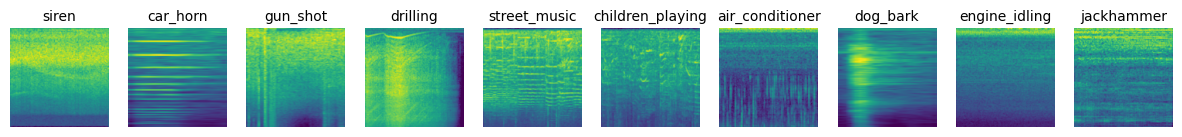

In [12]:

view_random_images(target_dir="./normalized_spectrograms/train/", num_classes=10, images_per_class = 1)



In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

training_data = train_gen.flow_from_directory(train_dir, target_size = (128, 128), batch_size=32, class_mode = "categorical")
test_data = test_gen.flow_from_directory(test_dir, target_size = (128, 128), batch_size=32, class_mode = "categorical")

Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Input

In [1]:
model_1 = Sequential([ 
    Conv2D(10, 3, input_shape = (128, 128, 4), activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

NameError: name 'Sequential' is not defined